# HW 4

This assignment covers Linear Classification methods

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**
  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials

### Refreshers
* [Intro to Machine Learning w scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [A tutorial on statistical-learning for scientific data processing](https://scikit-learn.org/stable/tutorial/statistical_inference/index.html#stat-learn-tut-index)
 
### Classification Approaches
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  
### Modeling   
* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics)

# Data Processing

**Q1** Get training data from the dataframe
1. Load mobile_data.csv from ```data'' folder into the dataframe
3. Assign values of ```price_range``` column to ```y```
4. Drop 'price_range' column from data frame,
5. Assign remaining df column values to x
6. Print the head of the dataframe

**A1** Replace ??? with code in the code cell below

In [242]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

#Read the mobile_data.csv file using the prropriate separator as input to read_csv()
df = pd.read_csv( '../data/mobile_data.csv', na_values = "?", comment='\t',sep=",", skipinitialspace=True)

df.head()



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [243]:
y= df[ 'price_range' ]

df.drop( 'price_range', axis=1, inplace=True )

x= df

In [244]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


**Q2:**
1. Check number of null values per column in the x dataframe.

**A2** Replace ??? with code in the code cell below

In [245]:
x.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        False     False  False   False       False   
1997          False  False        False     False  False   False       False   
1998          False  False        False     False  False   False       False   
1999          False  False        False     False  False  

**Q3.1**  Use seaborn heatmap chart to visualize the correlations between the columns.  Replace ??? with code in the code cell below

**A3.1**

<Axes: >

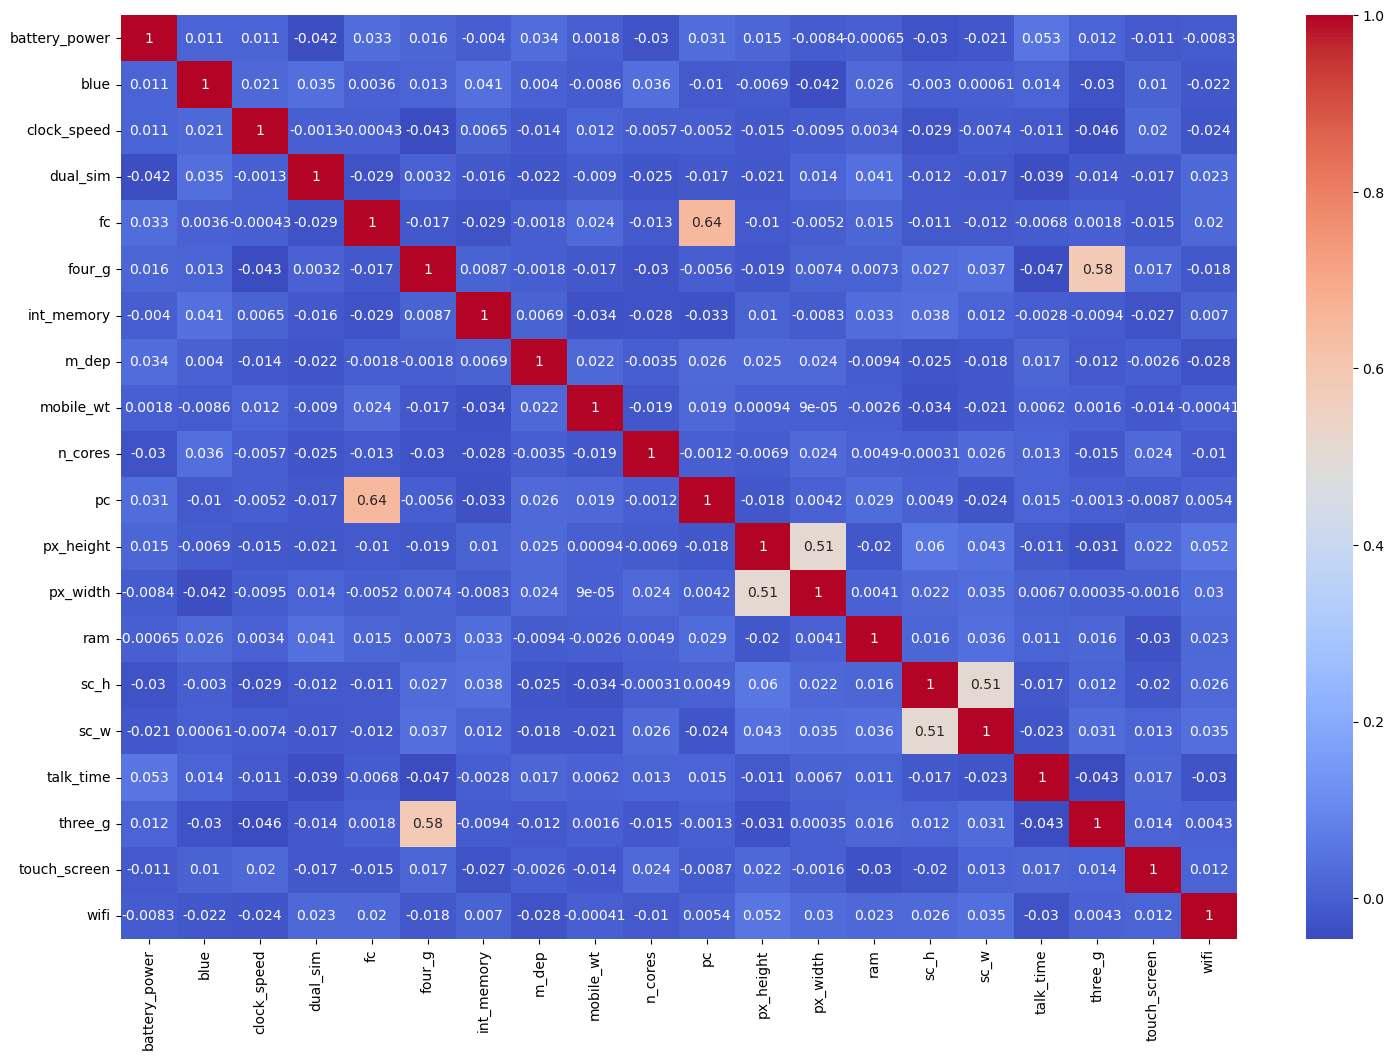

In [246]:
import seaborn as sns
plt.figure( figsize=(18,12) )
sns.heatmap( data=df.corr(), cmap='coolwarm', annot=True )

**Q3.2** List columns that correlate the most with the 'price_range' column.

**Note:** For this dataset any column that has correlation factor over or near 0.1 can be considered as a good predictor/ feature. 

**A3.2** Before i assigned 'inplace=True' when dropping the RAM row, it had the highest correlation with the price_range column at 0.92. 
Because the column has been dropped from our main dataframe, I'm unsure what the intended solution to this problem was supposed to be as we cannot visualize correlation between a variable we removed from the dataframe.

**Q3.3** Update the 'x' dataframe defined earlier in Q1 with your selected features/columns for 'price_range'.

**A3.3** Replace ??? with code in the code cell below

In [247]:
# A3 Part 3:

x = df[[ 'ram' ]].copy()

**Q4:** Use seaborn _histplot_ to plot a distribution graph for the price_range column

**A4** Replace ??? with code in the code cell below

<Axes: xlabel='price_range', ylabel='Count'>

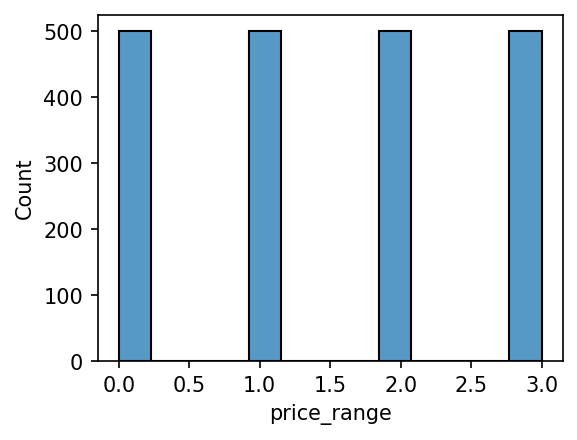

In [248]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot( data=y )

**Q5:** Use seaborn _histplot_ to present the relation between _price_range_ and the _ram_ of a mobile

**A5** Replace ??? with code in the code cell below

<Axes: xlabel='ram', ylabel='price_range'>

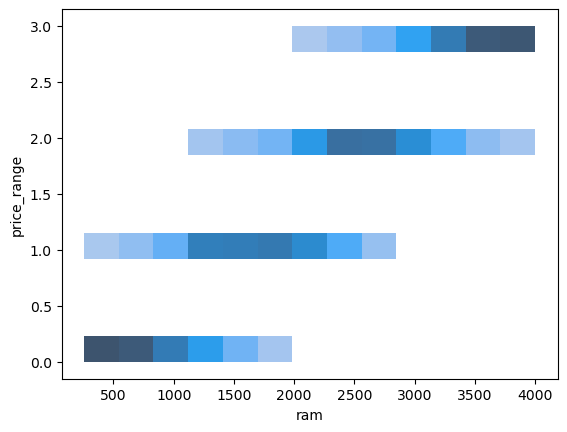

In [249]:
sns.histplot( data=df, x='ram', y=y )

**Q6:**
1. Use StandardScaler from sklearn to transform the x dataframe.
2. Split dataset into train and test data use train_test_split with test_size = 0.2 and random_state = 42
3. Check the number of instance in the train and test set.
4. Check the number of instance per class in train and test set using ytrain and ytest

**A6** Replace ??? with code in the code cell below

In [250]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [251]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [252]:
print( ytrain.value_counts() )
print( ytest.value_counts() )

price_range
1    409
2    408
0    395
3    388
Name: count, dtype: int64
price_range
3    112
0    105
2     92
1     91
Name: count, dtype: int64


In [253]:
ytrain.?

SyntaxError: invalid syntax (2332140937.py, line 1)

In [ ]:
ytest.?

# Classification Model 1: Logistic Regression

Here, we fit Logistic Regression model to the train dataset using K-fold cross validation

**Q7** Train Logistic Regression Model
1. Create a logistic regression model using sklearn [linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) library.
2. Fit the model with the train data 
3. Get the score from the model using test data
4. Plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), see [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A7** Replace ??? with code in the code cell below

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a logistic regression model using sklearn library
clf=?
clf.?

#print score for test data
print(?)

In [ ]:
cm = ?
plt.title("Logistic Reg. Model - Confusion Matrix")
plt.xticks(?, ?, fontsize=11)
plt.yticks(?, ?, fontsize=11)
plt.show()

**Q8:** Train Logistic Regression Model using cross-validation on _xtrain, ytrain_ data.
* Apply K fold cross validation technique for the model training (cross_val_score), and set K to 5 or 10. 
* Print the different scores from different folds

**A8:** Replace ??? with code in the code cell below

In [ ]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 
scores_log= ?

# print the scores from different folds
print(?)

# Classification Model 2: K Nearest Neighbor Classifier

Here, we learn how to fit KNN on the train dataset using k-fold cross validation, and evaluate its classification accuracy on the train dataset using confusion matrix. 

**Q9** Build a KNN Classification Model for the dataset as following: 

1. Create a KNN model using sklearn library,  and initialize n_neighbors as described in [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 
2. Fit the model with the train data 
3. Predict the values from test data
4. Print out the score from training and test data  
5. Repeat Step 1.- 4. for a range of ```n_neighbors``` values (k in kNN) from 1 to 30.

**A9** Replace ??? with code in the code cell below

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Define KNN model
for k in range(?,?):

    knn = ?

    #Fit KNN model on xtrain, ytrain from above
    knn.?
    #predict y values from xtest
    y_pred=knn.?

    #print score for test data
    print("K: ",k,"Train Score: ",knn.?, "Test Score: ",knn.?)

**Q9 Part 2:** 

 What is the best ```n_neighbors```? Why?

**A9** Write your part 2 answer in this cell


**Q10.** 

1. Create a KNN Classifier model using the best value of k found from previous question.
2. Train the model using xtrain, ytrain values.
2. Plot confusion matrix for the xtest and ytest, using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), see [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 


**A10** Replace ??? with code in the code cell below


In [ ]:
knn_best = ?

knn_best.?

In [ ]:
cm = ?
#plt.figure()
#plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("KNN Classifier Model - Confusion Matrix")
plt.xticks(?)
plt.yticks(?)
plt.show()

**Q11** Train KNN classifier using cross-validation approach, [sklearn.cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) tutorial.

**Note:**

Try a range of ```n_neighbors``` values (k in kNN) from 1 to 30. 

**A11** Replace ??? with code in the code cell below **

In [ ]:
# Define KNN model
from sklearn.model_selection import cross_val_score

for k in range(? , ?):
    #Define KNN model
    knn_crossval = ?
    
    # Use sklearn for 5 fold cross validation 
    scores_cv=?

    # print the scores from different folds
    print(?)

# Comparison

**Q12** Compare the two models (trained using xtrain,ytrain) in terms of score. 
* Train two different models on Train data
* Predict xtest using the trained models
* Make a correlation matrix between ytest and predicted ytest values from the two Models
* Your resulting matrix should be ```3x3 correlation matrix``` for xtest, ytest data
  * The matrix is symmetric
  * It will provide the correlation between two models predictions plus ytest
  * Hint: You can create a new dataframe using these values and use corr() function for creating the corelation matrix. Use meaningful column name while creating the dataframe.
  
**A12**
Replace ??? with code in the code cell below

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict Train dataset using logistic reg
clf= LogisticRegression()
clf.?
ypred_clf=?

# Predict Train dataset using KNN
knn= KNeighborsClassifier(n_neighbors=29)
knn.?
ypred_knn=?

print(ytest.shape, ypred_clf.shape, ypred_knn.shape)
# Create a dataframe using the predicted results from the models
df = ?

#copute correlation 

# Now use seaborn library to plot the heatmap correlation matrix
plt.figure(figsize=(8,8))
sns.?